<a href="https://colab.research.google.com/github/mvram123/Fashion_Mnist-Classification-Using-Kerastuner/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner

     |████████████████████████████████| 71kB 6.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=3d278c5db3210cfc61b3f28cf7799db4cb95c31aa89e3e26a5d30d3cbe842d3b
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=85408704a427b9444a66ea288cdd5defab2da77fea7bdc907f70bd1482ecd586
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
from keras.preprocessing.image import array_to_img,load_img
import cv2
import matplotlib.pyplot as plt
# image1= array_to_img(train_images[0],)
#im = cv2.imread("train_images[0]",)
#plt.imshow(im)
#image = load_img(train_images[0])

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

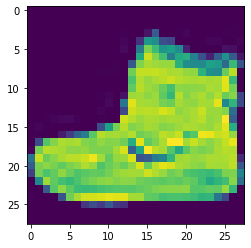

In [ ]:
image1= array_to_img(train_images[0])
plt.imshow(image1)

In [ ]:
# plt.imshow(train_images[0])

In [ ]:
def build_model(hp):
  model = keras.Sequential([
   keras.layers.Conv2D(
       filters = hp.Int('conv_1_filter', min_value=32, max_value=200, step=16), #Indicates no of Filters
       kernel_size=hp.Choice('conv_1_kernel', values = [3,5,7]), # Indicates the shape of kernel matrix
       activation='relu',
       input_shape=(28,28,1)
      ),
   keras.layers.Conv2D(
       filters = hp.Int('conv_2_filter', min_value=32, max_value=200, step=16), #Indicates no of Filters
       kernel_size=hp.Choice('conv_2_kernel', values = [3,5,7]), # Indicates the shape of kernel matrix
       activation='relu',
       input_shape=(28,28,1)
      ),
   keras.layers.Flatten(),
   keras.layers.Dense(
       units = hp.Int("dense_1_units",min_value=32,max_value=200,step=16),
       activation='relu',
       #kernel_initializer='he_uniform',
   ),
   keras.layers.Dense(units=10,activation='softmax')])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search = RandomSearch(build_model,objective='val_accuracy',max_trials=5,
                            directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 29s]
val_accuracy: 0.9006666541099548

Best val_accuracy So Far: 0.9006666541099548
Total elapsed time: 00h 02m 38s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 144)       7200      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 80)        103760    
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 160)               5120160   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1610      
Total params: 5,232,730
Trainable params: 5,232,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1746 - accuracy: 0.9344 - val_loss: 0.2687 - val_accuracy: 0.9020
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1357 - accuracy: 0.9483 - val_loss: 0.2858 - val_accuracy: 0.9063
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1032 - accuracy: 0.9603 - val_loss: 0.3251 - val_accuracy: 0.9068
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0804 - accuracy: 0.9711 - val_loss: 0.3748 - val_accuracy: 0.9057
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0644 - accuracy: 0.9757 - val_loss: 0.3667 - val_accuracy: 0.9035
Epoch 9/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0494 - accuracy: 0.9825 - val_loss: 0.4045 - val_accuracy: 0.9093
Epoch 10/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0417 - accuracy: 0.9846 - val_loss: 0.5035 - val_accuracy

In [ ]:
model.predict(test_images[:4])

array([[3.1208708e-13, 4.1616957e-22, 4.2853488e-19, 1.0847062e-17,
        1.1142116e-14, 2.1134629e-14, 1.5645719e-16, 7.0681816e-10,
        1.4878561e-20, 1.0000000e+00],
       [4.0806938e-07, 2.7586491e-27, 9.9999964e-01, 4.5920182e-20,
        1.8984849e-14, 6.2712109e-19, 5.3850440e-12, 1.5250230e-20,
        3.5891924e-22, 5.6526599e-18],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.1608660e-35,
        0.0000000e+00, 3.9573243e-38, 0.0000000e+00, 0.0000000e+00,
        1.2017176e-34, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 6.0137475e-38,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
test_labels[:4]

array([9, 2, 1, 1], dtype=uint8)